# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
!pip install citipy

In [2]:
 !pip install config

In [100]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st



# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

602

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [19]:

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
# query_url = f"{url}appid={weather_api_key }&q={city}&units={units}"
# #
# # Get weather data
# weather_response = requests.get(query_url)
#weather_json = weather_response.json()

# print(weather_json)

lat = []
lon = []
temperatures = []
wind_speed = []
clouds = []
humidity = []
country = []
date = []
cities_found = []

city_count = 0

for city in cities:
     
   
    query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=imperial"

    try:
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()

    
        lon.append(weather_json["coord"]["lon"])
        lat.append(weather_json["coord"]["lat"])
        
        temperatures.append(weather_json["main"]["temp"])
        wind_speed.append(weather_json["wind"]["speed"])
        clouds.append(weather_json["clouds"]["all"])
        humidity.append(weather_json["main"]["humidity"])
        country.append(weather_json["sys"]["country"])
        date.append(weather_json["dt"])
        cities_found.append(city)
        
        city_count = city_count + 1
        print("city: " + city + " " + str(city_count) )
    except:
        print("not found " + city)
    
    


city: zambezi 1
city: staraya kulatka 2
city: chuy 3
city: dunedin 4
city: jamestown 5
city: albany 6
city: thompson 7
city: bambous virieux 8
city: kamenka 9
not found ijaki
city: vaini 10
city: saskylakh 11
city: fortuna 12
not found taolanaro
city: srednekolymsk 13
city: le port 14
city: ushuaia 15
city: rikitea 16
city: bredasdorp 17
not found tsihombe
city: esperance 18
not found karaul
city: severo-kurilsk 19
city: arman 20
city: nybro 21
city: qaanaaq 22
city: mataura 23
city: tiksi 24
city: victoria 25
city: caravelas 26
city: usogorsk 27
city: punta arenas 28
not found tasbuget
city: belyy yar 29
city: busselton 30
city: sioux lookout 31
city: luganville 32
not found illoqqortoormiut
city: salalah 33
city: arlit 34
city: san andres 35
city: hermanus 36
city: dikson 37
city: dalby 38
not found attawapiskat
city: avarua 39
city: tuktoyaktuk 40
city: airai 41
city: sitio novo do tocantins 42
city: kodiak 43
city: sola 44
city: grand gaube 45
city: cabo san lucas 46
city: linxia 4

city: mayna 390
city: neuquen 391
city: lompoc 392
city: taywarah 393
city: tual 394
city: luau 395
city: batemans bay 396
city: solnechnyy 397
city: balakhninskiy 398
city: pindiga 399
city: puerto carreno 400
city: guerrero negro 401
city: manavalakurichi 402
not found sentyabrskiy
not found jiroft
city: fort morgan 403
city: ust-uda 404
city: tabas 405
city: menongue 406
city: lucapa 407
city: illapel 408
city: besikduzu 409
city: jaque 410
city: ancud 411
city: muncie 412
city: hearst 413
not found babanusah
city: richards bay 414
city: valdemarpils 415
city: mangrol 416
city: maarianhamina 417
city: mayo 418
city: fort saint james 419
city: homer 420
not found mrirt
city: puri 421
not found vaitupu
city: raahe 422
city: kaduy 423
city: dashitou 424
city: karacakoy 425
not found mullaitivu
city: hailar 426
city: tarbagatay 427
not found chagda
city: yenagoa 428
city: waddan 429
not found yirol
city: karratha 430
city: coihueco 431
city: eirunepe 432
city: aktau 433
not found palkak

In [61]:
city_df = pd.DataFrame({
                        "City Name": cities_found,
                        "Latitude": lat,
                        "Longitude": lon,
                        "Temperature": temperatures,  
                        "Wind Speed": wind_speed,
                        "Cloudiness": clouds,
                        "Humidity": humidity,
                        "Country": country,
    
                        "Date": date
                        
                        
                        })    


    
city_df


,City Name,Latitude,Longitude,Temperature,Wind Speed,Cloudiness,Humidity,Country,Date
0,zambezi,-13.5432,23.1047,67.41,3.78,100,76,ZM,1650760882
1,staraya kulatka,52.7167,47.6167,44.02,0.74,93,86,RU,1650760882
2,chuy,-33.6971,-53.4616,54.59,8.50,0,67,UY,1650760883
3,dunedin,-45.8742,170.5036,57.79,11.99,94,61,NZ,1650760883
4,jamestown,42.0970,-79.2353,69.21,1.99,0,56,US,1650760708
...,...,...,...,...,...,...,...,...,...
542,bandarbeyla,9.4942,50.8122,81.14,6.35,30,75,SO,1650761101
543,taunggyi,20.7833,97.0333,73.27,3.60,7,56,MM,1650761101
544,ternate,0.8000,127.4000,82.81,2.73,49,73,ID,1650761102
545,wangaratta,-36.3667,146.3333,63.25,2.30,0,66,AU,1650761102


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [62]:
city_data_to_load = "cities.csv"

city_data = pd.read_csv(city_data_to_load)


In [63]:
city_df.to_csv(r' file\File Name.csv', index = False)



## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [64]:
humidity_count = city_df.loc[city_df["Humidity"]> 100]
    
(len(humidity_count))    

0

In [65]:
#  Get the indices of cities that have humidity over 100%.
# THERE AREN"T ANY


In [66]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [67]:
humidity_count = city_df.loc[city_df["Humidity"]<= 100]
humidity_count

,City Name,Latitude,Longitude,Temperature,Wind Speed,Cloudiness,Humidity,Country,Date
0,zambezi,-13.5432,23.1047,67.41,3.78,100,76,ZM,1650760882
1,staraya kulatka,52.7167,47.6167,44.02,0.74,93,86,RU,1650760882
2,chuy,-33.6971,-53.4616,54.59,8.50,0,67,UY,1650760883
3,dunedin,-45.8742,170.5036,57.79,11.99,94,61,NZ,1650760883
4,jamestown,42.0970,-79.2353,69.21,1.99,0,56,US,1650760708
...,...,...,...,...,...,...,...,...,...
542,bandarbeyla,9.4942,50.8122,81.14,6.35,30,75,SO,1650761101
543,taunggyi,20.7833,97.0333,73.27,3.60,7,56,MM,1650761101
544,ternate,0.8000,127.4000,82.81,2.73,49,73,ID,1650761102
545,wangaratta,-36.3667,146.3333,63.25,2.30,0,66,AU,1650761102


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

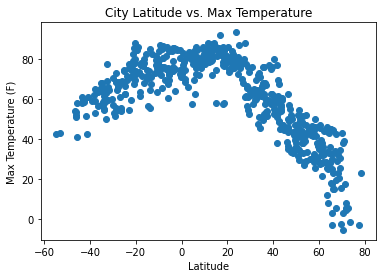

In [68]:
                                 
plt.scatter(city_df["Latitude"],city_df["Temperature"])  
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.title('City Latitude vs. Max Temperature')
plt.show()

## Latitude vs. Humidity Plot

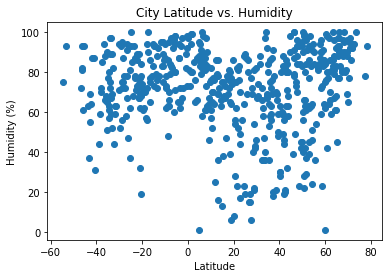

In [69]:
plt.scatter(city_df["Latitude"],city_df["Humidity"])  
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.title('City Latitude vs. Humidity')
plt.show()

## Latitude vs. Cloudiness Plot

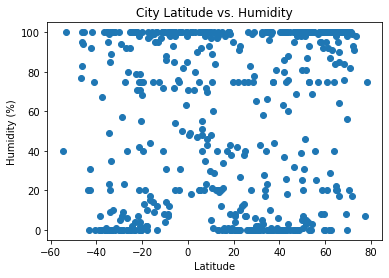

In [95]:
plt.scatter(city_df["Latitude"],city_df["Cloudiness"])  
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.title('City Latitude vs. Humidity')
plt.show()

## Latitude vs. Wind Speed Plot

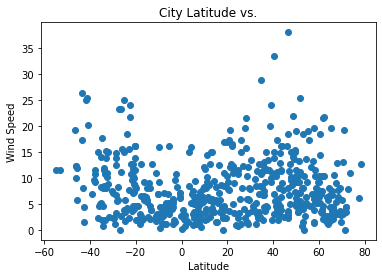

In [96]:
plt.scatter(city_df["Latitude"],city_df["Wind Speed"])  
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')
plt.title('City Latitude vs.')
plt.show()

## Linear Regression

In [97]:
northern_hemisphere_df = city_df.loc[city_df["Latitude"] >= 0]
southern_hemisphere_df = city_df.loc[city_df["Latitude"] <= 0]




####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between weight and average tumor volume
is -0.9.


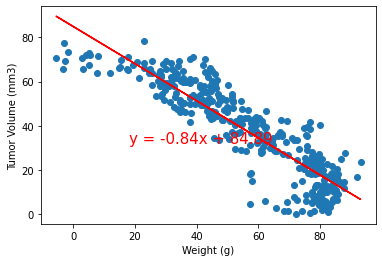

In [103]:
x = northern_hemisphere_df['Temperature']
y = northern_hemisphere_df['Latitude']


correlation = st.pearsonr(x,y)

print(f"""The correlation between weight and average tumor volume
is {round(correlation[0],2)}.""")


(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

plt.annotate(line_eq,(18,32),fontsize=15,color="red")

plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

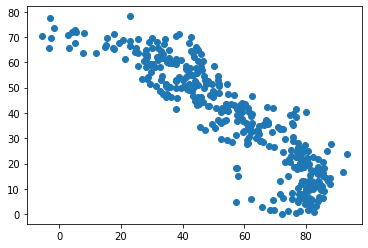

In [104]:
x = northern_hemisphere_df['Temperature']
y = northern_hemisphere_df['Latitude']


plt.scatter(x,y)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression